In [ ]:
%matplotlib inline

# Data analysis

In this notebook you will find:
- Necessary imports
- Participant age information
- Number of dyslexic parents
- Function to calculate the average erp per class (risk/no risk)
- Frequency domain features
- Connectivity with stimulus and without 

Note: Make sure you run the data analysis notebook before to have the right paths in the `metadata.csv`!

# Imports

Below are the necessary imports for this notebook. mne_connectivity still needs to be added to the environment. 

In [ ]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from math import nan

# Make sure that the 5 imports below are all installed using pip install ... 
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity
import pyvista 
import mayavi
import vtk

# To be deleted once eegyolk is working for initializaiton_functions
import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import initialization_functions

import eegyolk
import helper_functions as hf # library useful for eeg and erp data cleaning
import epod_helper

The newest version of mne is necessary to run connectivity plots. If you don't have the latest version, uncomment and run the line below.

In [3]:
# pip install git+https://github.com/mne-tools/mne-python.git

## Load metadata and epochs

In the notebook `data_prep_eeg.ipynb` a csv-file `metadata.csv` is created. It is saved in the same folder as this notebook. The csv contains information about the participants and the corresponding eeg and epoch files. 

In [4]:
metadata = pd.read_csv('metadata.csv', sep = ',')

In [5]:
metadata.head()

,eeg_file,ParticipantID,test,sex,age_months,dyslexic_parent,Group_AccToParents,path_eeg,path_epoch,path_eventmarkers,epoch_file
0,101a,101,a,m,20,m,At risk,F:/Stage/ePODIUM/Data/ePodium_projectfolder/Da...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ep...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ev...,101a_epo.fif
1,102a,102,a,f,20,Nee,Control,F:/Stage/ePODIUM/Data/ePodium_projectfolder/Da...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ep...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ev...,102a_epo.fif
2,103a,103,a,f,20,m,At risk,F:/Stage/ePODIUM/Data/ePodium_projectfolder/Da...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ep...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ev...,103a_epo.fif
3,104a,104,a,m,18,f,At risk,F:/Stage/ePODIUM/Data/ePodium_projectfolder/Da...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ep...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ev...,104a_epo.fif
4,105a,105,a,f,17,f,At risk,F:/Stage/ePODIUM/Data/ePodium_projectfolder/Da...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ep...,F:/Stage/ePODIUM/Data/ePodium_projectfolder/ev...,105a_epo.fif


The epochs can be read from the directed paths stored in the metadata. The function below loads all files into a list called `epochs`.

In [6]:
epochs = initialization_functions.read_filtered_data(metadata)

Checking out file: 101a_epo.fif
Checking out file: 102a_epo.fif
Checking out file: 103a_epo.fif
Checking out file: 104a_epo.fif
Checking out file: 105a_epo.fif
Checking out file: 106a_epo.fif
Checking out file: 107a_epo.fif
Checking out file: 109a_epo.fif
Checking out file: 110a_epo.fif
Checking out file: 111a_epo.fif
Checking out file: 112a_epo.fif
Checking out file: 114a_epo.fif
Checking out file: 115a_epo.fif
Checking out file: 116a_epo.fif
Checking out file: 117a_epo.fif
Checking out file: 118a_epo.fif
Checking out file: 119a_epo.fif
Checking out file: 124a_epo.fif
Checking out file: 125a_epo.fif
Checking out file: 126a_epo.fif
Checking out file: 127a_epo.fif
Checking out file: 128a_epo.fif
Checking out file: 129a_epo.fif
Checking out file: 130a_epo.fif
Checking out file: 131a_epo.fif
Checking out file: 133a_epo.fif
Checking out file: 135a_epo.fif
Checking out file: 136a_epo.fif
Checking out file: 137a_epo.fif
Checking out file: 138a_epo.fif
Checking out file: 139a_epo.fif
Checking

## Single participant information

Choose which participant you want to view in the box below. 

In [7]:
index = widgets.IntText(
    step=0.1,
    description='Participant',
    disabled=False
)
widgets.VBox([index])

In [8]:
index = int(index.value)

below files can be dropped, since they do not contain all the events. 

In [9]:
drop_files = ["102a","113a", "107b (deel 1+2)", "132a", "121b(2)", "113b", "107b (deel 3+4)", "147a",
                "121a", "134a", "143b", "121b(1)","136a", "145b", "150a","152a", "184a", "165a", "151a", "163a", "179a","179b", "182b", "186a", "193b"]

metadata = metadata[~metadata['eeg_file'].isin(drop_files)]

### Visualize raw eeg 

In [10]:
path_eeg = os.path.join(metadata['path_eeg'][index], metadata['eeg_file'][index] + '.bdf')
raw_eeg = mne.io.read_raw_bdf(path_eeg, preload=False)

Extracting EDF parameters from F:\Stage\ePODIUM\Data\ePodium_projectfolder\Dataset\101a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


Using matplotlib as 2D backend.


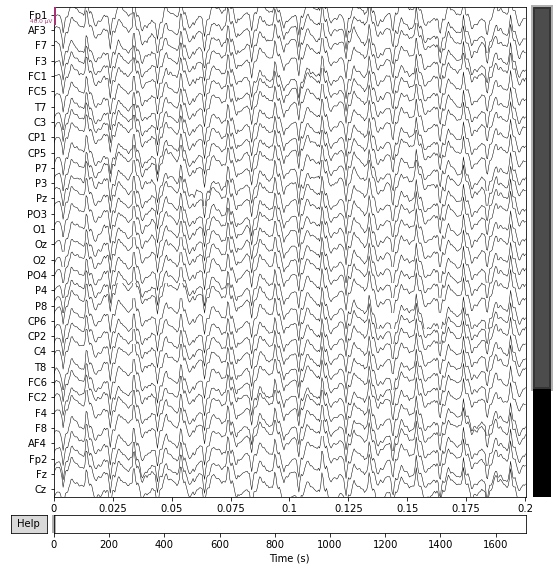

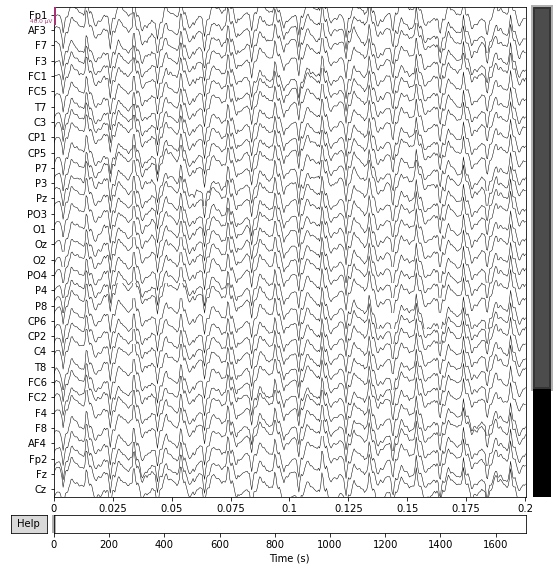

In [11]:
raw_eeg.plot(duration=0.2, n_channels=32)

In [12]:
path_event = os.path.join(metadata['path_eventmarkers'][index], metadata['eeg_file'][index] + '.txt') 
event_markers = np.loadtxt(path_event, dtype=int)
event_markers_simplified = epod_helper.group_events_12(event_markers) # simplify events

<ipython-input-13-56f5d4ef35c7>:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(event_markers_simplified, event_id = epod_helper.event_dictionary)


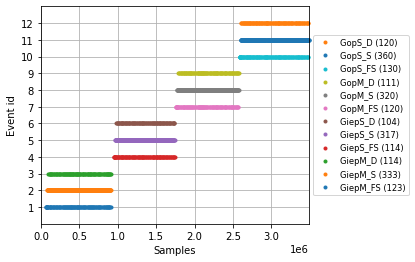

In [13]:
%matplotlib inline 
fig = mne.viz.plot_events(event_markers_simplified, event_id = epod_helper.event_dictionary)

### Vizualize epochs and evoked responses

The sensors are placed as the standard montage and are visualized below. 

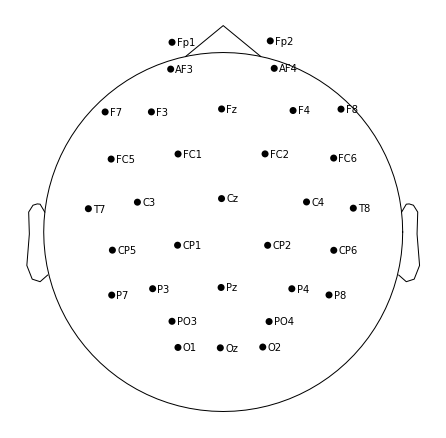

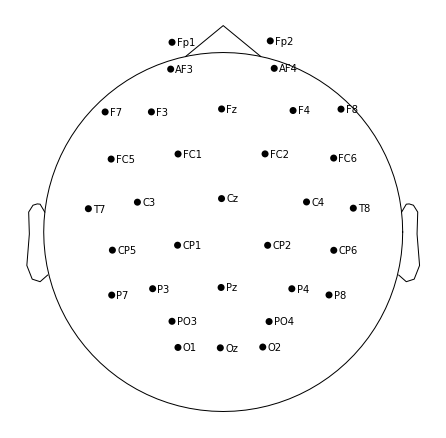

In [14]:
epochs[index].plot_sensors(ch_type='eeg', show_names=True)

Evoked responses are created by averaging the epochs for a specific event. The function therefore needs as input the created `epochs` and `event_dictionary` containing the different types of events used in the experiment. 

In [15]:
event_dictionary = epod_helper.event_dictionary
evoked = hf.evoked_responses(epochs[index], event_dictionary)

Below each event is plotted for a single subject with the average for each channel. 

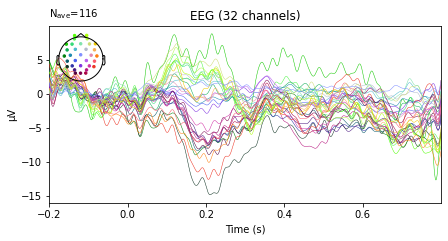

('GiepM_FS', 1)


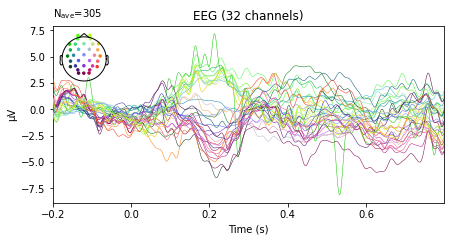

('GiepM_S', 2)


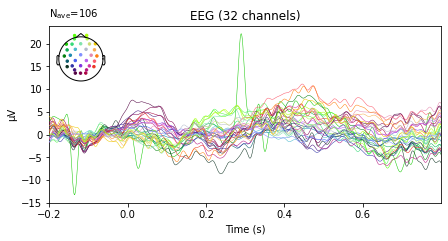

('GiepM_D', 3)


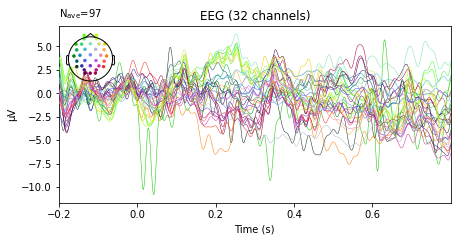

('GiepS_FS', 4)


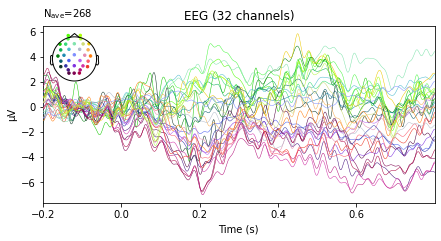

('GiepS_S', 5)


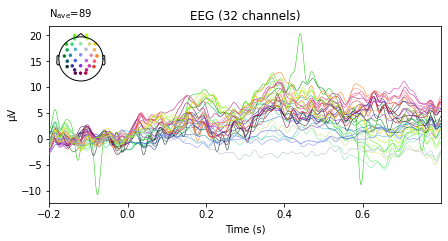

('GiepS_D', 6)


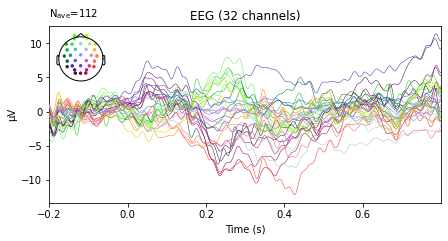

('GopM_FS', 7)


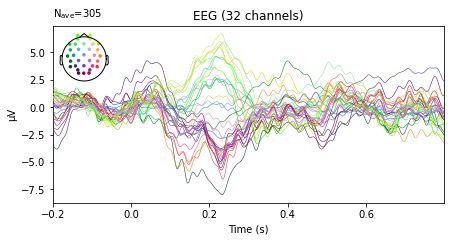

('GopM_S', 8)


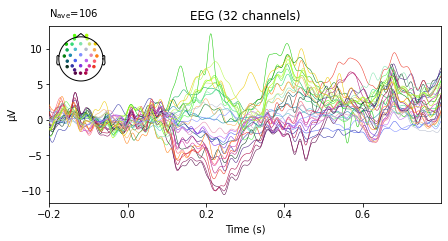

('GopM_D', 9)


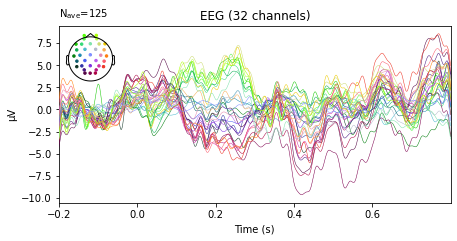

('GopS_FS', 10)


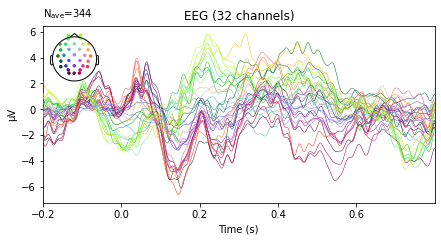

('GopS_S', 11)


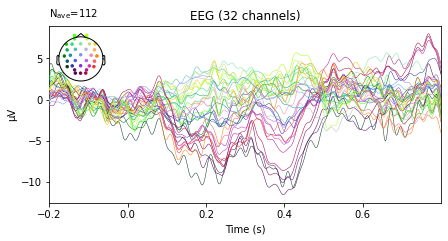

('GopS_D', 12)


In [16]:
for i in range(len(event_dictionary)):
    evoked[i].plot(spatial_colors=True, exclude='bads')
    print(([key for key in epod_helper.event_dictionary.keys()][i], [value for value in epod_helper.event_dictionary.values()][i]))

The grand average is calculated by the average response on all events combined for each channel. 

Identifying common channels ...


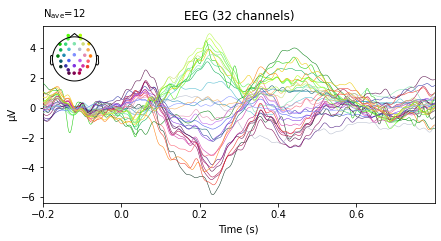

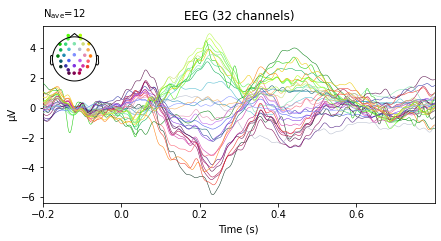

In [17]:
ga_singlesub = mne.grand_average(evoked)
ga_singlesub.plot(spatial_colors=True)

We will now only look at the standard events, which are events 2, 5, 8 and 11. The first standards were removed, since the participant need some time to adjust to the standard not being 'new' anymore. The deviant events differ from the standard one and are 3, 6, 9 and 12. First, the average per channel for the standard and deviant is calculated and plotted. The second plots shows the mean over all channels between the standard and deviant. 

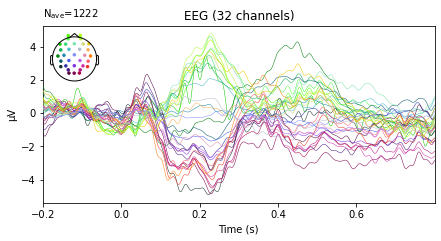

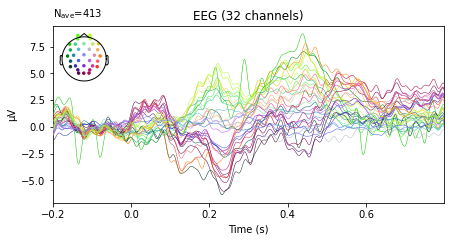

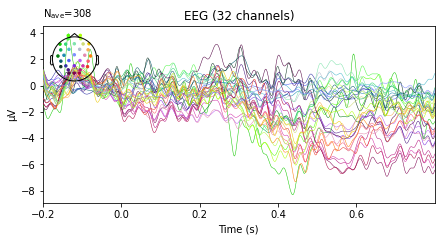

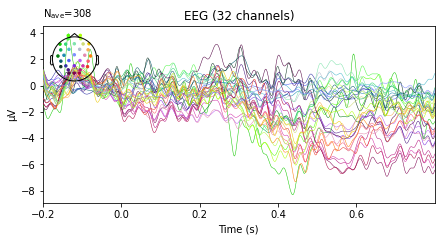

In [18]:
standard = ['GiepM_S','GiepS_S','GopM_S','GopS_S']
deviant = ['GiepM_D','GiepS_D','GopM_D','GopS_D']

std_evoked = epochs[index][standard].average()
dev_evoked = epochs[index][deviant].average()
std_evoked.plot(spatial_colors=True)
dev_evoked.plot(spatial_colors=True)

evoked_diff = mne.combine_evoked([std_evoked, dev_evoked], weights=[1, -1])
evoked_diff.plot(spatial_colors=True)

## All participant information

The value to classify will be whether the participant is at risk for dyslexia or not. The age distribution for both groups is plotted below.

count    40.000000
mean     18.350000
std       1.561557
min      15.000000
25%      17.000000
50%      18.000000
75%      20.000000
max      21.000000
Name: age_months, dtype: float64

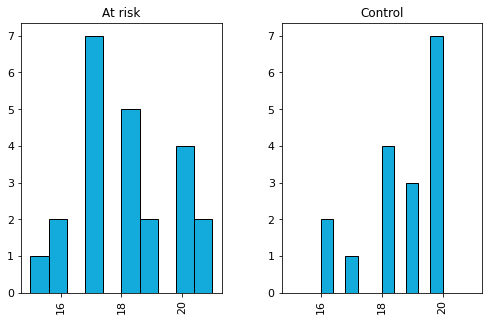

In [19]:
hist = metadata.hist(column='age_months',by='Group_AccToParents',color='#12ABDB',sharex=True, figsize=(8,5), xlabelsize=11, ylabelsize=11,bins=10,ec='black')
metadata['age_months'].describe()

Count of the gender for both groups. 

In [20]:
metadata.groupby('Group_AccToParents')['sex'].value_counts()

Group_AccToParents  sex
At risk             m      12
                    f      11
Control             m      12
                    f       5
Name: sex, dtype: int64

Count of whether the mom or dad is dyslexic or not. 

In [21]:
metadata.groupby('Group_AccToParents')['dyslexic_parent'].value_counts()

Group_AccToParents  dyslexic_parent
At risk             m                  13
                    f                   7
                    mf                  3
Control             Nee                17
Name: dyslexic_parent, dtype: int64

## ERP per group

This function is able to calculate the average erp for a specific condition. The function needs a dataframe like `metadata.csv` which contains the epoch files and the participants characteristics. It also needs as input the characteristic we are interested in and a single value of this characteristic. For example if we want to look at the average erp for the children who are at risk, the group will be the column (feature) containing the values at risk or control and the value will be 'at risk'. The function also needs the event dictionary in order to average the epochs over multiple participants. 

In [22]:
def data_analysis(dataframe, group, value, event_dictionary):
    epochs = []
    dataframe = dataframe.loc[metadata[group] == value]
    evokeds = []
    filenames = []
    
    for index, file in dataframe.iterrows():
        print(f"Checking out file: {file['epoch_file']}")
        path = os.path.join(file['path_epoch'], file['epoch_file'])
        epoch = mne.read_epochs(path, preload=False, verbose=False)
        epochs.append(epoch)
        filenames.append(file['epoch_file'])
    
    for event in event_dictionary:
        for epoch in epochs:
            evoked = epoch[event].average()
            evokeds.append(evoked)
        
        grand_evoked_events = mne.grand_average(evokeds)
        grand_evoked_events.plot(spatial_colors=True, exclude='bads')
        print(event)       
    
    return 

Checking out file: 101a_epo.fif
Checking out file: 103a_epo.fif
Checking out file: 104a_epo.fif
Checking out file: 105a_epo.fif
Checking out file: 106a_epo.fif
Checking out file: 107a_epo.fif
Checking out file: 109a_epo.fif
Checking out file: 110a_epo.fif
Checking out file: 111a_epo.fif
Checking out file: 112a_epo.fif
Checking out file: 114a_epo.fif
Checking out file: 115a_epo.fif
Checking out file: 116a_epo.fif
Checking out file: 125a_epo.fif
Checking out file: 128a_epo.fif
Checking out file: 129a_epo.fif
Checking out file: 130a_epo.fif
Checking out file: 137a_epo.fif
Checking out file: 140a_epo.fif
Checking out file: 141a_epo.fif
Checking out file: 142a_epo.fif
Checking out file: 148a_epo.fif
Checking out file: 149a_epo.fif
Identifying common channels ...


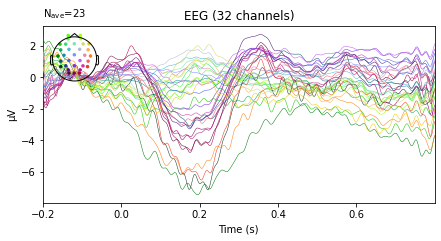

GiepM_FS
Identifying common channels ...


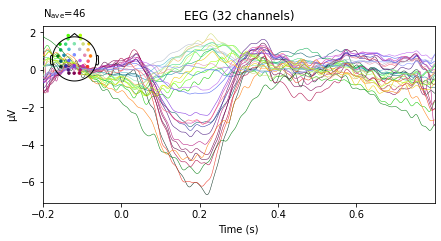

GiepM_S
Identifying common channels ...


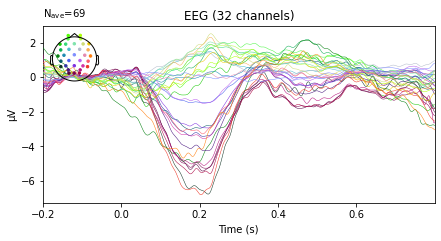

GiepM_D
Identifying common channels ...


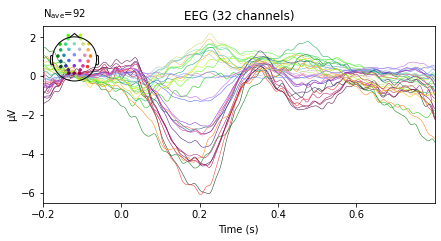

GiepS_FS
Identifying common channels ...


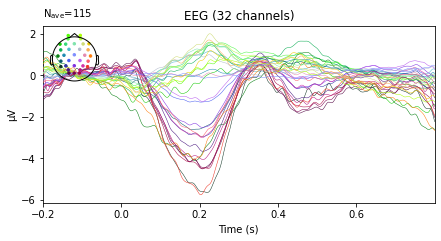

GiepS_S
Identifying common channels ...


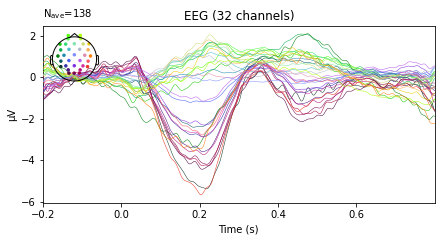

GiepS_D


In [ ]:
atrisk = data_analysis(metadata, group='Group_AccToParents', value = 'At risk', event_dictionary = epod_helper.event_dictionary)

In [ ]:
control = data_analysis(metadata, group='Group_AccToParents', value = 'Control', event_dictionary = epod_helper.event_dictionary)

## Connectivity 

In [ ]:
dataframe = metadata
epochs = []
for index, file in dataframe.iterrows():
    print(f"Checking out file: {file['epoch_file']}")
    path = os.path.join(file['path_epoch'], file['epoch_file'])
    epoch = mne.read_epochs(path, preload=False)
    epochs.append(epoch)

Computing eeg connectivity

In [ ]:
def data_connectivity(dataframe, group, value):
    epochs = []
    dataframe = dataframe.loc[metadata[group] == value]
    
    for index, file in dataframe.iterrows():
        print(f"Checking out file: {file['epoch_file']}")
        path = os.path.join(file['path_epoch'], file['epoch_file'])
        epoch = mne.read_epochs(path, preload=False)
        epochs.append(epoch)
    
    epochs_con = mne.concatenate_epochs(epochs)
    
    fmin, fmax = 4., 9.
    sfreq = epochs_con.info['sfreq']  # the sampling frequency
    tmin = 0.0  # exclude the baseline period
    
    con = spectral_connectivity_epochs(
        epochs_con, method='pli', mode='multitaper', fmin=fmin, fmax=fmax,
        faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

    # Now, visualize the connectivity in 3D:
    
    return plot_sensors_connectivity(epochs_con.info, con.get_data(output='dense')[:, :, 0]), spectral_connectivity_epochs(
        epochs_con, method='pli', mode='multitaper', fmin=fmin, fmax=fmax,
        faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

In [ ]:
connectivityplot_atrisk, connections_atrisk = data_connectivity(metadata[:1], group='Group_AccToParents', value = 'At risk')

In [ ]:
connections_atrisk = connections_atrisk.get_data(output='dense')[:, :, 0]
matrix = pd.DataFrame(connections_atrisk)
matrix

In [ ]:
connectivityplot_control, connections_control = data_connectivity(metadata[:5], group='Group_AccToParents', value = 'Control')

In [ ]:
connections_control = connections_control.get_data(output='dense')[:, :, 0]
matrix = pd.DataFrame(connections_control)
matrix